In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from time import time as ct
import random

pd.options.display.max_columns = None
pd.options.display.max_rows = None

%matplotlib inline

## Dowloading sample data

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Data Transformation

### One Hot encoding

In [4]:
def one_hot_encoder(df,column_name,prefix=None):
    '''
    This function created one hot encoded dummy variable for any given column_name
    Parameters:
        df          : The input Pandas dataframe
        column_name : The column that has to be one hot encoded
        prefix      : The prefix to the new created column with the 1/0 flag for given column_name, If no prefix is provided, then column_name will be prefixed
    Returns:
        Dataframe with the added on-hot encoded columns
    '''
    if prefix == None: prefix = coulmn_name
    return pd.concat([df,pd.get_dummies(df[column_name], prefix=prefix)],axis=1)

In [7]:
one_hot_encoder(tips,column_name='sex',prefix='Gender').sample(10)

,total_bill,tip,sex,smoker,day,time,size,Gender_Male,Gender_Female
151,13.13,2.00,Male,No,Sun,Dinner,2,1,0
231,15.69,3.00,Male,Yes,Sat,Dinner,3,1,0
26,13.37,2.00,Male,No,Sat,Dinner,2,1,0
55,19.49,3.51,Male,No,Sun,Dinner,2,1,0
94,22.75,3.25,Female,No,Fri,Dinner,2,0,1
118,12.43,1.80,Female,No,Thur,Lunch,2,0,1
134,18.26,3.25,Female,No,Thur,Lunch,2,0,1
64,17.59,2.64,Male,No,Sat,Dinner,3,1,0
174,16.82,4.00,Male,Yes,Sun,Dinner,2,1,0
119,24.08,2.92,Female,No,Thur,Lunch,4,0,1


### Box-Cox Transformation

In [8]:
def box_cox_transform(feature=None, lambda_ = 0.25 , reverse = False ):
    '''
    This function returns the normalized distribution of input array by applying a Box-Cox transformation
    OR returns the reverse transform of a box-cox transformation if reverse is set to True

    Parameters:
        feature : A numpy array of the feature that you want to transform
        lambda_ : Lambda value for the box-cox transformation (The lambda can be estimated by using maximum likelihood to optimize the normality of the model results
        reverse : Default False, if set to True, the function will return the revese transform of a box-cox transformation
    '''
    if type(feature) is np.ndarray:
        if reverse == False:
            print('Applying Box-Cox Transformation to the input array')
            y_ = (feature ** lambda_) - 1
            return y_
        else:
            print('Reversing Box-Cox Transformation to the input array')
            y_ = (feature + 1) ** (1/lambda_)
            return y_
    else:
        print('The input array is not a numpy array! Please provide a numpy array as input.')
        return

In [11]:
def show_distribution(df=None,variable_name='',
                      pctl = [1, 10, 20, 25, 30 , 33, 40 , 50 , 60 , 67, 70, 75, 80 , 90 , 99], 
                      plot= True, bins = 50,
                      decimals_ = 2):
    '''
    This function shows the distribution (Histogram plot) of any variable and returns some important percentile values of the variable
    Parameters:
        df            : The pandas dataframe that contains this variable data
        varaible_name : String, Name of the variable for which the distribution should be shown
        pctl          : List of Percentile values that should be returned (1 to 100 in multiples of 1)
        plot          : Boolean, Default True; Will plot a histogram if set to True
        bins          : The number of bins into which the data should be plotted on the histogram
        decimals_     : # of decimals shown for the varaible
    '''
    percentil = df[variable_name].quantile(np.linspace(.01, 1, 99, 0), 'lower')
    op = percentil.to_frame().reset_index()
    op.index = op.index+1.
    op = op[op.index.isin(pctl)]
    op.rename(columns = {'index': 'Percentile'},inplace=True)
    op.loc[len(op.index)] = [0, df[variable_name].min()]
    op.loc[len(op.index)] = [1, df[variable_name].max()]
    op['Percentile'] = 'p_'+ (op['Percentile']*100).astype(int).astype(str).str.zfill(2)
    op.loc[len(op.index)] = ['AVG', df[variable_name].mean()]
    op.sort_values(by=[variable_name,'Percentile'],inplace = True)
    op.reset_index(inplace=True,drop=True)
    op[variable_name] = op[variable_name].round(decimals_)
    if plot == True:
        plt.figure(figsize = (20,8))
        sns.histplot(x=df[variable_name], bins = bins, kde= True)
    return op

,Percentile,total_bill
0,p_00,3.07
1,p_01,7.25
2,p_10,10.34
3,p_20,12.60
4,p_25,13.28
5,p_30,14.15
6,p_33,15.01
7,p_40,16.21
8,p_50,17.78
9,AVG,19.79


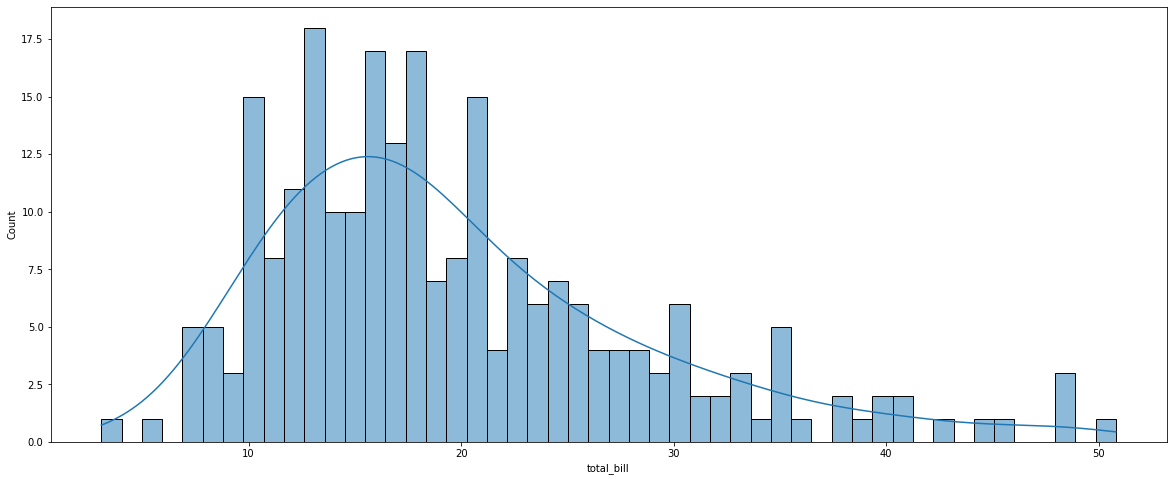

In [18]:
#Distribution before transform - Right Skewed
show_distribution(df=tips,variable_name='total_bill')

In [19]:
tips['total_bill_bcx'] = box_cox_transform(feature=tips['total_bill'].values,lambda_=0.25)

Applying Box-Cox Transformation to the input array


,Percentile,total_bill_bcx
0,p_00,0.32
1,p_01,0.64
2,p_10,0.79
3,p_20,0.88
4,p_25,0.91
5,p_30,0.94
6,p_33,0.97
7,p_40,1.01
8,p_50,1.05
9,AVG,1.07


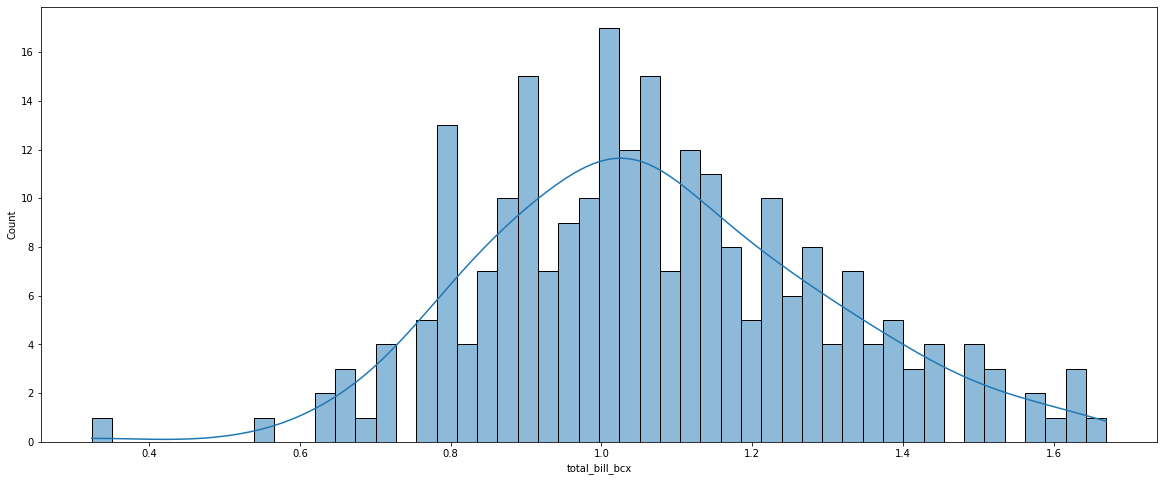

In [21]:
#Distribution after transform - Normalized
show_distribution(df=tips,variable_name='total_bill_bcx')

### Creating Bins from a feature

In [22]:
def bin_function(feature=None,bins=10, return_bin_limits = False):
    '''
    This function takes a Numpy array or Pandas series as an input and divides it into bins with equal number or values in each bin
    Parameters : 
        feature           : Numpy array or Pandas series which will be divided into bins with equal number of values in them
        bins              : Number of bins
        return_bin_limits : This feature returns the bin limits in a dataframe if set to True
    Returns :
        Pandas dataframe with the original array along with the bin that it belongs to starting from 0 to bins-1;
        If return_bin_limits is set to True then it also return the bin limits as a dataframe
    '''
    print('NOTE: Lower Limit is exclusive (except minimum value) and Upper Limit is inclusive')
    feature_op = pd.DataFrame({'Input Values': feature })
    feature_op['Bin'] = pd.qcut(feature_op['Input Values'], bins, labels=False)
    if return_bin_limits != False :
        b = int(np.floor(100/bins)) 
        pct_lower = np.array([i/100 for i in range(0,100,b)])
        pct_upper = pct_lower + b/100
        pct_val = np.array([feature.quantile(i) for i in pct_upper])
        bins_op = pd.DataFrame({'Lower Limit':pct_lower*100,'Upper Limit':pct_upper*100, 'Bin Upper Limit Values': pct_val})
        return feature_op, bins_op
    else : return feature_op

In [25]:
bin_function(feature=tips['total_bill'],bins=10, return_bin_limits = False).sample(10)

NOTE: Lower Limit is exclusive (except minimum value) and Upper Limit is inclusive


,Input Values,Bin
72,26.86,8
134,18.26,5
56,38.01,9
59,48.27,9
166,20.76,6
92,5.75,0
211,25.89,7
68,20.23,6
195,7.56,0
93,16.32,4


### Standard Scaler Transformation
(x-mu)/sigma

In [28]:
from sklearn.model_selection import train_test_split

y = tips['total_bill']
X = tips[['tip','size']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [29]:
# While evaluating the model - Transform the Test X
SS=joblib.load(MODEL_PATH+scaler_transform_name)
X_te_ = pd.DataFrame(SS.transform(X_test),columns=X_test.columns)

In [32]:
def std_scaler_transform (train_df, scaler_path = 'std_scaler', test_transform = False):
    '''
    This function performs a standard scaler transformation on all columns of train_df and saves the transformer to 'scaler_path'
    Parameters:
        train_df       : Dataframe with the columns to be transformed (numeric columns)
        scaler_path    : The PATH at which the scaler is saved, this can be used later to tranform the test data as well. Default name = 'std_scaler'
        test_transform : Boolean, Default False; When set to True, the function uses an earlier saved scaler transformation function to transform the test dataset
        
    Returns : Transformed Dataframe
    '''
    import joblib
    from sklearn.preprocessing import StandardScaler
    ss_name = scaler_path+".pkl"
    
    if test_transform == False:
        # We save the transformer as it helps to transform the test data later
        ss = StandardScaler()
        ss.fit(X_train)
        joblib.dump(ss,ss_name)
        ss=joblib.load(ss_name)
        X_tr = pd.DataFrame(ss.transform(X_train),columns=X_train.columns)
        return X_tr        
    else:
        # While evaluating the model - To transform the Test X
        ss=joblib.load(ss_name)
        X_tr = pd.DataFrame(ss.transform(X_test),columns=X_test.columns)
        
    return X_tr

In [34]:
std_scaler_transform (X_train, scaler_path = 'std_scaler', test_transform = False).head()

,tip,size
0,3.101608,1.512853
1,-1.035358,-0.579390
2,-0.538650,-0.579390
3,-0.892469,-0.579390
4,-0.695147,-0.579390


In [35]:
std_scaler_transform (X_test, scaler_path = 'std_scaler', test_transform = True).head()

,tip,size
0,0.665697,0.466731
1,0.223423,0.466731
2,-0.695147,2.558975
3,-0.695147,-0.579390
4,-0.354936,1.512853
